### Supporting Jupyter Notebook for: "***Solar Cycle Detected in Natural Tritium Ice layers before the Nuclear Era***"


In [ ]:
'''
L. Palcsu (1), E. László (1), G. Surányi (2), M. Túri (1), D. Vargas (1), M. Veres (3), A. Cauquoin (4), 
L. Zákány (3), R. Janovics (3), I. Csige (1), and M. Temovski (1) 

(1) Isotope Climatology and Environmental Research Centre, HUN-REN Institute for Nuclear Research (ATOMKI), 
Debrecen, Hungary
(2) Institute for Particle and Nuclear Physics, HUN-REN Wigner Research Centre for Physics, Budapest, Hungary
(3) Isotoptech Ltd.Debrecen, Hungary
(4) Institute of Industrial Science (IIS), The University of Tokyo, Kashiwa, Japan

'''

In [3]:
## Import libraries
import pyleoclim as pyleo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
## Import records
colleg = pd.read_excel(r'../data/Tritium_dataset.xlsx', sheet_name='Sheet1')
ts_colleg = pyleo.Series(
    time=colleg["Year"],
    value=colleg["Tritium corrected (TU)"],
    time_name='Age',
    time_unit='Years',
    value_name='Tritium',
    value_unit='TU',
    label='Colle Gnifetti', verbose=False)

sunspots = pd.read_excel(r'../data/Tritium_dataset.xlsx', sheet_name='Sheet2')
ts_sunspots = pyleo.Series(
    time=sunspots["Year"],
    value=sunspots["Sunspots"],
    time_name='Age',
    time_unit='Years',
    value_name='Sunspot number',
    #value_unit=' ',
    label='Sunspots', verbose=False)

neutron = pd.read_excel(r'../data/Tritium_dataset.xlsx', sheet_name='Sheet3')
ts_neutron = pyleo.Series(
    time=neutron["Year"],
    value=neutron["Neutron count rate"],
    time_name='Age',
    time_unit='Years',
    value_name='Neutron Flux',
    #value_unit=' ',
    label='Neutron Flux', verbose=False)

## Figure 7

In [5]:
## Pre-processing records for natural Tritium evaluation
## Glacier Colle-Gnifetti slice time-series for pre-bomb tests
ts_colleg1923 = ts_colleg.slice([1923, 1955])
ts_colleg1923det = ts_colleg1923.detrend(method='linear')

Performing wavelet coherence on surrogate pairs: 100%|██████████| 200/200 [1:24:07<00:00, 25.24s/it]


(<Figure size 900x1200 with 6 Axes>,
 {'ts1': <Axes: ylabel='Tritium [TU]'>,
  'ts2': <Axes: xlabel='Time [Years]', ylabel='Sunspot number'>,
  'wtc': <Axes: ylabel='Scale [Years]'>,
  'xwt': <Axes: xlabel='Time [Years]', ylabel='Scale [Years]'>})

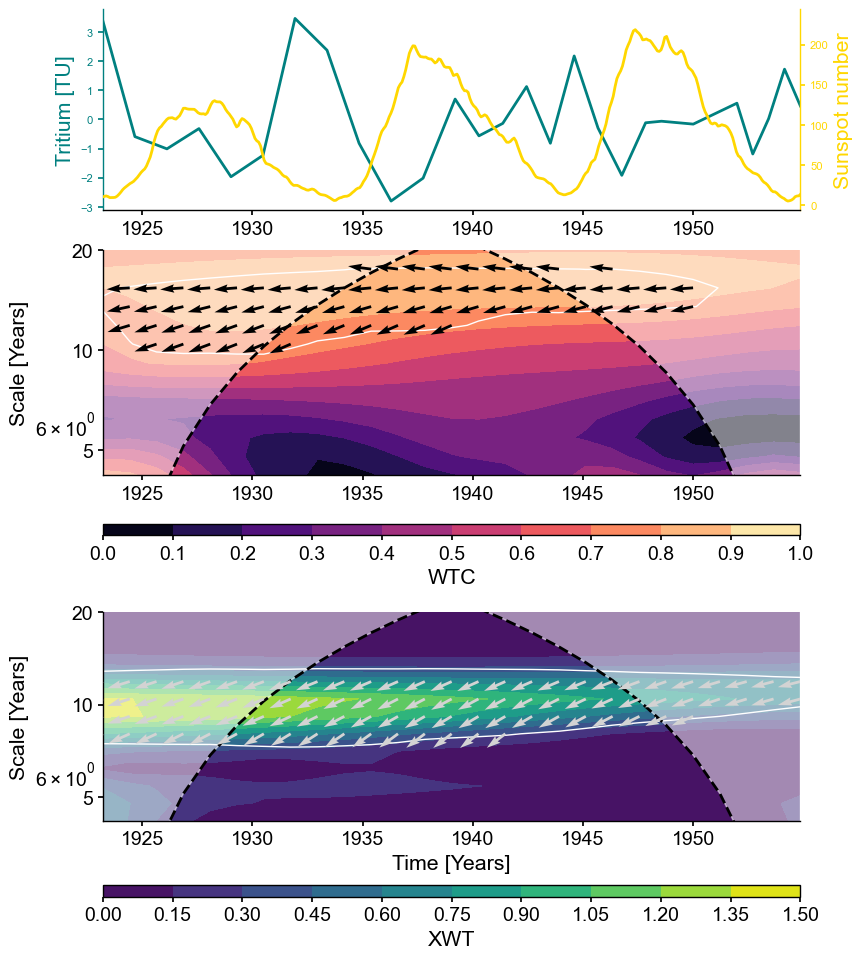

In [7]:
## Calculate wavelet coherence
coh = ts_colleg1923det.wavelet_coherence(ts_sunspots, method='wwz', freq_kwargs={'fmin':1/20,'fmax':1,'nf':24})
coh_sig = coh.signif_test(number=200)
coh_sig.dashboard(line_colors=['teal','gold'])

In [10]:
## Calculate the phase angle between tritium and sunspots over the interval 9-11 years:
phase = coh.phase_stats(scales=[9,11])
print("The mean angle is {:4.2f}°".format(phase.mean_angle/np.pi*180))
print(phase)

The mean angle is -157.42°
Results(mean_angle=-2.7474650592988117, kappa=198.2357482465477, sigma=0.07111456569518367, kappa_hi=4127.915069853709, sigma_lo=0.015565425012152781)


## Supporting Figure S6

Performing wavelet coherence on surrogate pairs: 100%|██████████| 200/200 [2:02:05<00:00, 36.63s/it] 


(<Figure size 900x1200 with 6 Axes>,
 {'ts1': <Axes: ylabel='Tritium [TU]'>,
  'ts2': <Axes: xlabel='Time [Years]', ylabel='Neutron Flux'>,
  'wtc': <Axes: ylabel='Scale [Years]'>,
  'xwt': <Axes: xlabel='Time [Years]', ylabel='Scale [Years]'>})

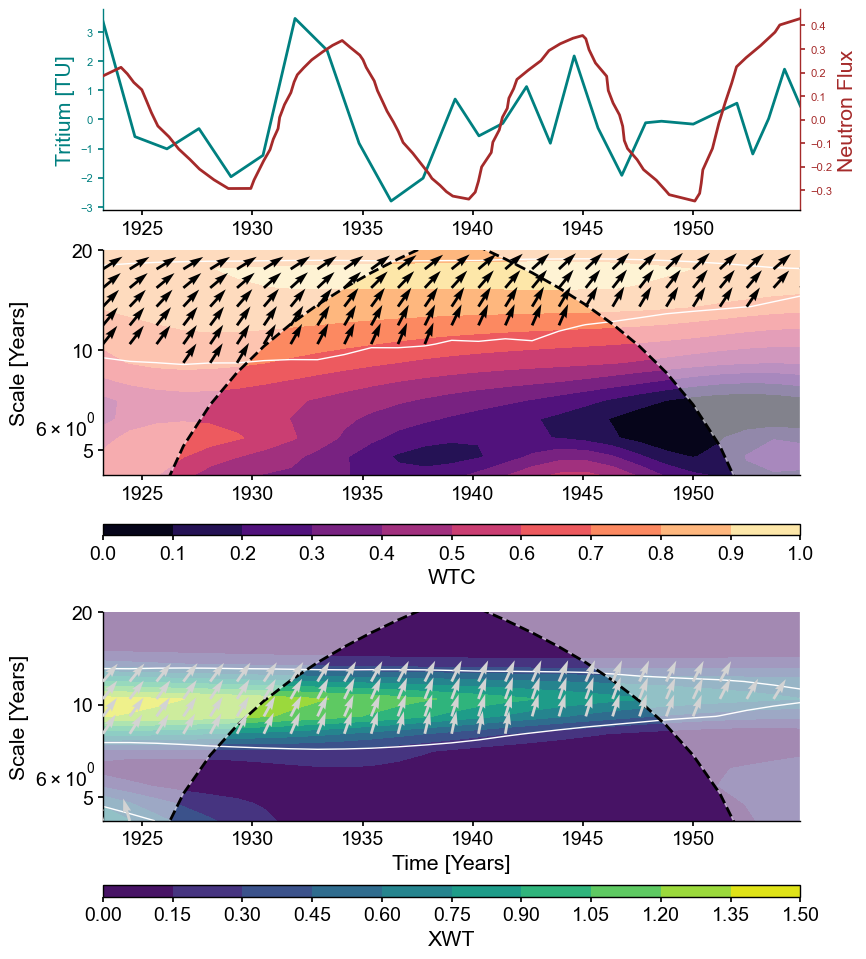

In [4]:
## Linear detrend neutron flux dataset
ts_neutrondet = ts_neutron.detrend(method='linear')

## Calculate wavelet coherence
coh2 = ts_colleg1923det.wavelet_coherence(ts_neutrondet, method='wwz', freq_kwargs={'fmin':1/20,'fmax':1,'nf':24})
coh2_sig = coh2.signif_test(number=200)
coh2_sig.dashboard(line_colors=['teal','brown'])


In [6]:
## Calculate the phase angle between tritium and neutron flux at 11 years:
phase = coh2.phase_stats(scales=11)
print("The mean angle is {:4.2f}°".format(phase.mean_angle/np.pi*180))
print(phase)

The mean angle is 62.99°
Results(mean_angle=1.0993992584544858, kappa=87.02397387236621, sigma=0.10750726781339483, kappa_hi=1685.4004472359102, sigma_lo=0.024361998205560516)


## Supporting Figure S7

Performing spectral analysis on individual series: 100%|██████████| 2000/2000 [00:02<00:00, 846.64it/s]
Performing spectral analysis on individual series: 100%|██████████| 2000/2000 [00:02<00:00, 885.21it/s]
Performing spectral analysis on individual series: 100%|██████████| 2000/2000 [00:29<00:00, 67.52it/s]
Performing spectral analysis on individual series: 100%|██████████| 2000/2000 [00:01<00:00, 1415.95it/s]
Performing spectral analysis on individual series: 100%|██████████| 2000/2000 [7:04:22<00:00, 12.73s/it]  


(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Period [years]', ylabel='PSD'>)

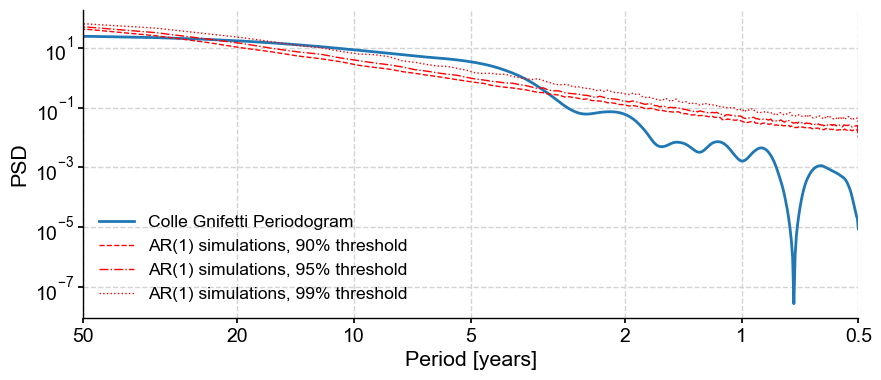

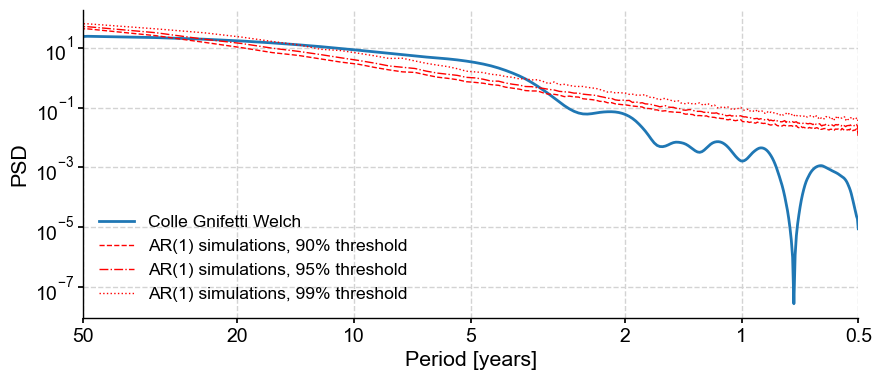

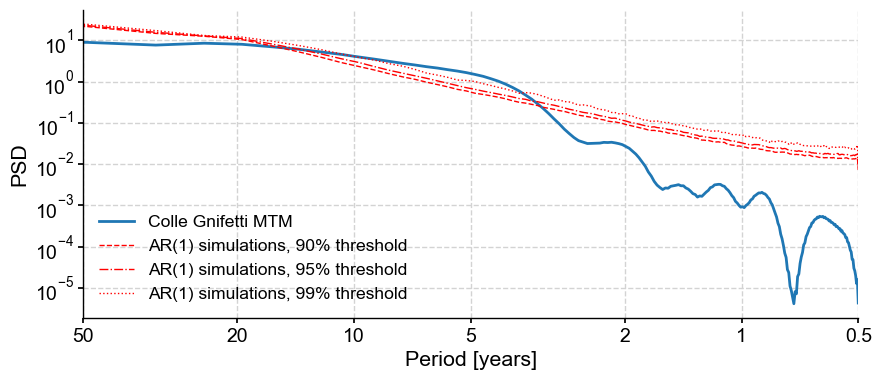

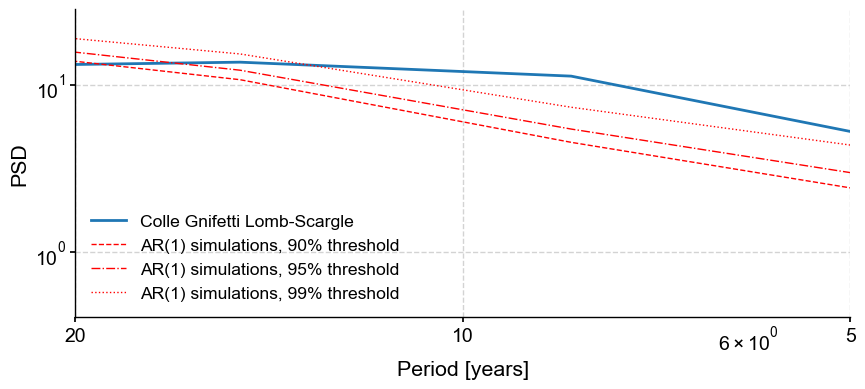

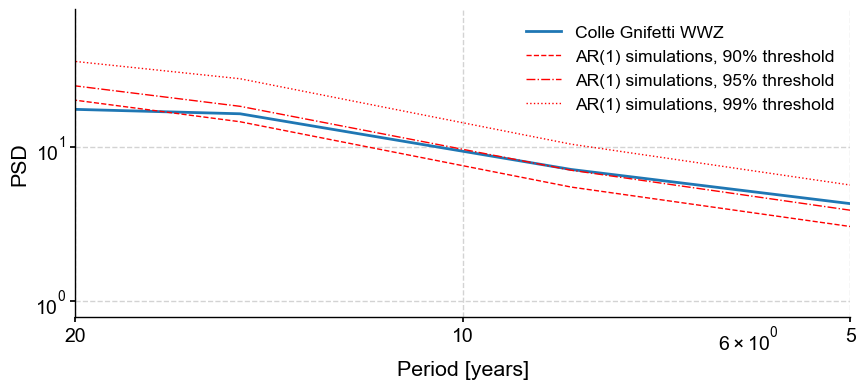

In [131]:
## Employs full Colle Gnifetti record (1923-2020)
psd_per = ts_colleg.interp(step=0.25).standardize().spectral(method='periodogram').signif_test(method='ar1sim', number=2000, qs=[0.90,0.95,0.99])
psd_per.plot(label='Colle Gnifetti Periodogram')

psd_per = ts_colleg.interp(step=0.25).standardize().spectral(method='periodogram').signif_test(method='ar1sim', number=2000, qs=[0.90,0.95,0.99])
psd_per.plot(label='Colle Gnifetti Welch')

psd_mtm = ts_colleg.interp(step=0.25).standardize().spectral(method='mtm').signif_test(method='ar1sim', number=2000, qs=[0.90,0.95,0.99])
psd_mtm.plot(label='Colle Gnifetti MTM')

psd_ls = ts_colleg.standardize().spectral(method='lomb_scargle').signif_test(method='ar1sim', number=2000, qs=[0.90,0.95,0.99])
psd_ls.plot(label='Colle Gnifetti Lomb-Scargle')

psd_wwz = ts_colleg.standardize().spectral(method='wwz').signif_test(method='ar1sim', number=2000, qs=[0.90,0.95,0.99])
psd_wwz.plot(label='Colle Gnifetti WWZ')